In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# linear Regression

In [2]:
x = np.linspace(-3, 3, 100)
print(x)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [3]:
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))

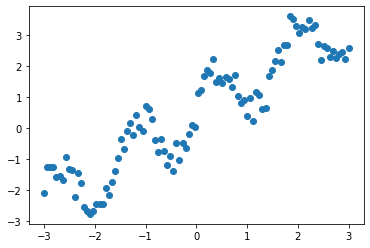

In [4]:
plt.plot(x, y, 'o');

In [5]:
print('Before: ', x.shape)
X = x[:, np.newaxis]
print('After: ', X.shape)

Before:  (100,)
After:  (100, 1)


Again, we start by splitting our dataset into a training (75%) and a test set (25%):

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Next, we use the learning algorithm implemented in `LinearRegression` to **fit a regression model to the training data**:

In [7]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

After fitting to the training data, we paramerterized a linear regression model with the following values.

In [8]:
print('Weight coefficients: ', regressor.coef_)
print('y-axis intercept: ', regressor.intercept_)

Weight coefficients:  [0.90211711]
y-axis intercept:  0.44840974988268


Since our regression model is a linear one, the relationship between the target variable (y) and the feature variable (x) is defined as 

$$y = weight \times x + \text{intercept}$$.

Plugging in the min and max values into thos equation, we can plot the regression fit to our training data:

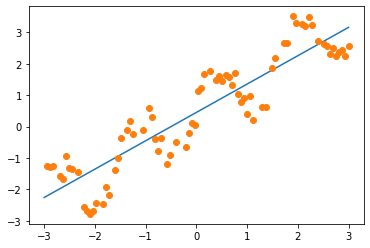

In [9]:
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train, y_train, 'o');

In [10]:
y_pred_train = regressor.predict(X_train)

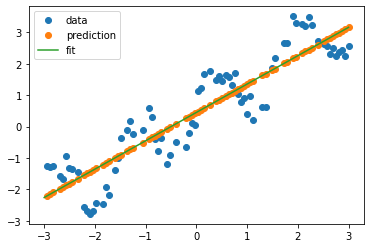

In [11]:
plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, 'o', label="prediction")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best')

As we can see in the plot above, the line is able to capture the general slope of the data, but not many details.

Next, let's try the test set:

In [12]:
y_pred_test = regressor.predict(X_test)

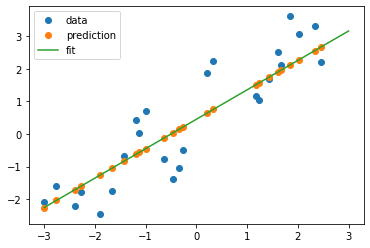

In [13]:
plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test, 'o', label="prediction")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best');

Again, scikit-learn provides an easy way to evaluate the prediction quantitatively using the ``score`` method. For regression tasks, this is the R<sup>2</sup> score. Another popular way would be the Mean Squared Error (MSE). As its name implies, the MSE is simply the average squared difference over the predicted and actual target values

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (\text{predicted}_i - \text{true}_i)^2$$

In [14]:
regressor.score(X_test, y_test)

0.7994321405079685

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Add a feature containing  `sin(4x)` to `X` and redo the fit. Visualize the predictions with this new richer, yet linear, model.
      </li>
    </ul>
</div>

In [15]:
# %load solutions/07A_lin_with_sine.py

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Compare the KNeighborsRegressor and LinearRegression on the boston housing dataset. You can load the dataset using ``sklearn.datasets.load_boston``. You can learn about the dataset by reading the ``DESCR`` attribute.
      </li>
    </ul>
</div>

In [16]:
# %load solutions/07B_knn_vs_linreg.py